In [3]:
#インポート

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [6]:
#ファイルパスを変数に入れる

dir_path = '../../csv/titanic/'

#train.csvを読み込む
train_df = pd.read_csv(dir_path + 'train.csv')

#test.csvを読み込む
test_df = pd.read_csv(dir_path + 'test.csv')


In [7]:
#先頭の5行を確認
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#先頭の5行を確認
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#データフレームの大きさを確認
#列数が違うことが分かる

print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [10]:
#学習データとテストデータを縦に連結させる
#  ignore_index=True でインデックス番号を振りなおす
df = pd.concat([train_df, test_df], ignore_index=True)

In [12]:
#連結出来ていた
df.shape

(1309, 12)

In [13]:
#最後の五行を確認
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [15]:
#性別の内訳をグラフで確認する
#matplotlib

df.groupby('Sex').agg({'Sex':'count'})

,Sex
Sex,
female,466
male,843


In [16]:
tmp = df.groupby('Sex').agg({'Sex':'count'}).rename(columns={'Sex': 'count_sex'})

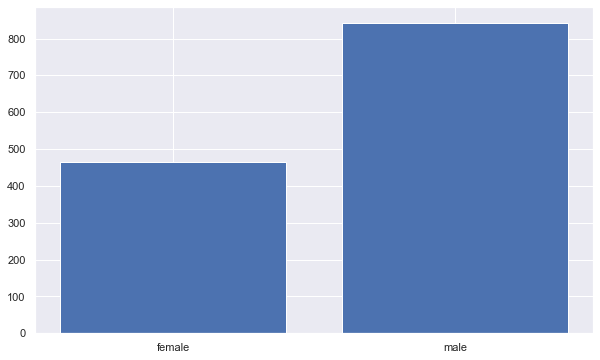

In [19]:
plt.figure(figsize=(10, 6))

plt.bar(tmp.index, tmp.count_sex)
plt.show()

<AxesSubplot:xlabel='Sex'>

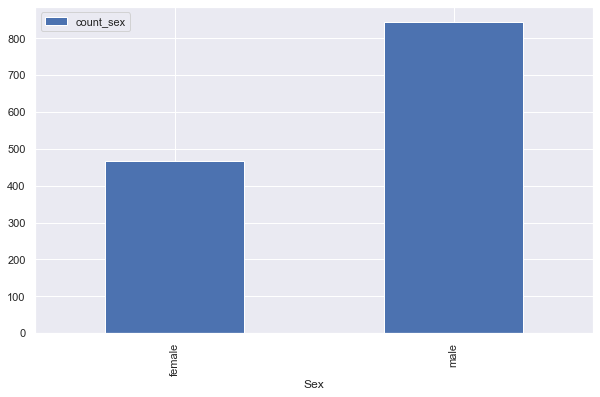

In [20]:
#pandas でグラフ

tmp.plot(kind='bar', figsize=(10,6))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

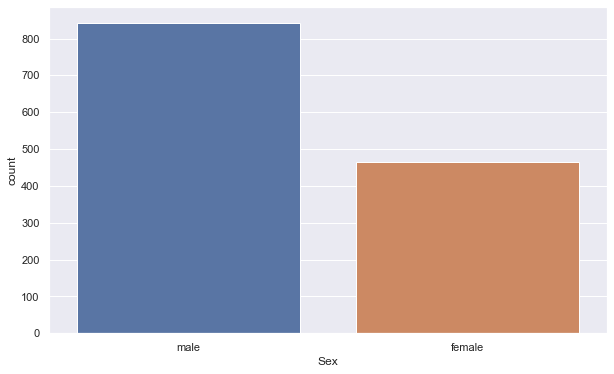

In [21]:
#seaborn でグラフを作る

plt.figure(figsize=(10,6))

sns.countplot('Sex', data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

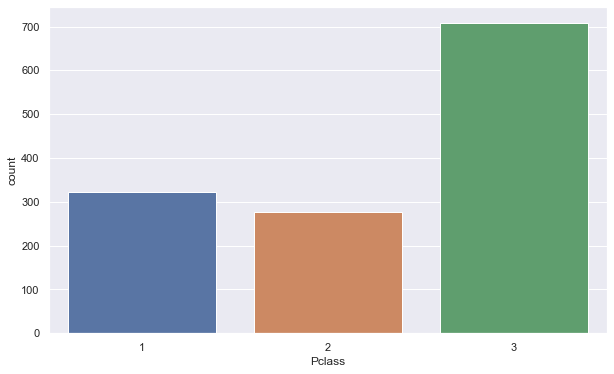

In [22]:
# チケットのランクと人数をグラフで確認

plt.figure(figsize=(10,6))

sns.countplot('Pclass', data=df)

### 1番高級な1番が以外にも2番目の人気だった

## 今回はチケットのクラス、年齢、性別、港 の４つの特徴で機械学習を進める

In [23]:
#データ内の欠損値を確認

df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

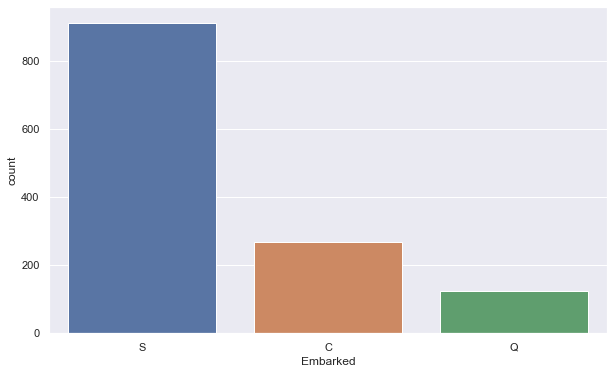

In [24]:
# Embarkedの欠損値が2と少ないので最も乗客が多い港で補完する

plt.figure(figsize=(10,6))

sns.countplot('Embarked', data=df)

In [26]:
#ほとんどがSからの乗車だったのでSで補う
#元のデータをコピーする。元のデータに編集しない

df2 = df.copy()
df2['Embarked'] = df2['Embarked'].fillna('S')

In [28]:
#欠損値が補完された
df2.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [29]:
#年齢の補完を行うために年齢層をヒストグラムで確認
#最大値　最小値を確認

print(df2['Age'].max())
print(df2['Age'].min())

80.0
0.17


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

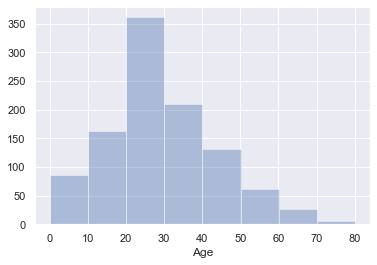

In [30]:
#最大が80歳だったのでグラフを8つの棒グラフで構成
sns.distplot(df2.Age, bins=8, kde=False)

#### グラフを見ると30代～80代が多いため、平均年齢が高くなってしまう。
#### 年齢の補完には平均ではなく、中央値を採用する。

In [34]:
#やっぱり平均の方が中央値より高かった

print(df2['Age'].mean())
print(df['Age'].median())

29.881137667304014
28.0


In [35]:
#年齢を中央値で補完
df3 = df2.copy()

age_median = df3['Age'].median()

df3['Age'] = df3['Age'].fillna(age_median)

In [37]:
df3.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [40]:
#使わないカラムを消す

df4 = df3.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'])
df4.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0.0,3,male,22.0,S
1,2,1.0,1,female,38.0,C
2,3,1.0,3,female,26.0,S
3,4,1.0,1,female,35.0,S
4,5,0.0,3,male,35.0,S


In [43]:
#性別と港を数値化する
#港をワンホットエンコーディングする
tmp_Embarked = pd.get_dummies(df4['Embarked'], prefix='Embarked')
tmp_Embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [45]:
#元のデータの横に連結する
df5 = pd.concat([df4, tmp_Embarked], axis=1).drop(columns=['Embarked'])
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,0,0,1
1,2,1.0,1,female,38.0,1,0,0
2,3,1.0,3,female,26.0,0,0,1
3,4,1.0,1,female,35.0,0,0,1
4,5,0.0,3,male,35.0,0,0,1


In [48]:
#性別の数値変換　ラベルエンコーディング
df5['Sex'] = pd.get_dummies(df5['Sex'], drop_first=True)
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,0,0,1
1,2,1.0,1,0,38.0,1,0,0
2,3,1.0,3,0,26.0,0,0,1
3,4,1.0,1,0,35.0,0,0,1
4,5,0.0,3,1,35.0,0,0,1


In [53]:
#学習データをtrain に格納する

train = df5[~df['Survived'].isnull()]# Survivedが空でないものだけ抽出

#テストデータをtest に格納する


test = df5[df['Survived'].isnull()]# Survivedが空のものだけ抽出
test.head()



,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
891,892,NaN,3,1,34.5,0,1,0
892,893,NaN,3,0,47.0,0,0,1
893,894,NaN,2,1,62.0,0,1,0
894,895,NaN,3,1,27.0,0,0,1
895,896,NaN,3,0,22.0,0,0,1


In [54]:
# test のSurvivedを消す
test = test.drop(columns=['Survived'])
test.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
891,892,3,1,34.5,0,1,0
892,893,3,0,47.0,0,0,1
893,894,2,1,62.0,0,1,0
894,895,3,1,27.0,0,0,1
895,896,3,0,22.0,0,0,1


In [55]:
#正解をy_trainに格納
y_train = train['Survived']

#特徴量をX_train に格納
X_train = train.drop(columns=['Survived'])

In [56]:
#分割が完了
print(y_train.head())
print(X_train.head())

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64
   PassengerId  Pclass  Sex   Age  Embarked_C  Embarked_Q  Embarked_S
0            1       3    1  22.0           0           0           1
1            2       1    0  38.0           1           0           0
2            3       3    0  26.0           0           0           1
3            4       1    0  35.0           0           0           1
4            5       3    1  35.0           0           0           1


In [61]:
#インポート
from sklearn import tree

In [58]:
#treeの前準備

model = tree.DecisionTreeClassifier()

In [60]:
#決定木モデルの作成

model.fit(X_train ,y_train)

DecisionTreeClassifier()

In [62]:
#作成した決定木もモデルを使って予測を行う

y_pred = model.predict(test)

In [63]:
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [66]:
#テストデータと元のデータが同じ大きさか確認する

len(test), len(y_pred)

(418, 418)

In [68]:
#予測結果を元のでデータに連結させる

test['Survived'] = y_pred

In [69]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S,Survived
891,892,3,1,34.5,0,1,0,0.0
892,893,3,0,47.0,0,0,1,0.0
893,894,2,1,62.0,0,1,0,0.0
894,895,3,1,27.0,0,0,1,1.0
895,896,3,0,22.0,0,0,1,0.0


In [73]:
#kaggle提出用データにまとめる

pred_df = test[['PassengerId' ,'Survived']].set_index('PassengerId')

In [76]:
#小数点以下を丸める
pred_df['Survived'] = pred_df['Survived'].astype(int)
pred_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0


In [77]:
#csv に書き込む

pred_df.to_csv('titanic_answer.csv', index_label=['PassengerId'])